Q1. For an $\mathcal{H}$ with $d_{VC} = 10$, if you want 95% confidence that your generalization error is at most 0.05, what is the closest numerical approximation of the sample size that the VC generalization bound predicts?

A. 

By using the generalization bound, and approximating $m_{\mathcal{H}}(2N) \approx (2N)^{d_{VC}}$, we get that


$$N \geq \frac{8}{\epsilon^2} \log \left ( \frac{4((2N)^{d_{VC}} + 1)}{\delta} \right )$$, 

so when $d_{VC} = 10$, $\epsilon = 0.05$ and $\delta = 0.05$, we get

$$N \geq \frac{8}{0.05^2} \log \left ( \frac{4(2N)^{10} + 1)}{0.05} \right )$$


In [261]:
import math

def estimateN(N, epsilon, delta, dvc):
    ''' estimation function for determining examples given initial estimate N'''
    estimate = (8 / (epsilon*epsilon)) * math.log((4* ((2*N)**10) + 1) / delta)
    
    if (estimate - N)**2 <= 0.01:
        return estimate
    else:
        return estimateN(estimate, epsilon, delta, dvc)

In [262]:
estimateN(1000, 0.05, 0.05, 10)

452956.8624225618

__ A1. [d] 460,000 __

Q2. There are a number of bounds on the generalization error $\epsilon$, all holding with probability at least $1 - \delta$. Fix $d_{VC} = 50$ and $\delta = 0.05$ and plot these bounds as a function of $N$. Which bound is the smallest for very large N, say N = 10, 000? Note that [c] and [d] are implicit bounds in $\epsilon$. 



For N = 10000:
vc is 0.632174915200836
Rademacher is 0.3313087859616395
Parrondo and Van den Broek is 0.22382177493925573
Devroye is 0.2152281052374131

For N = 5:
vc is 13.828161484991483
Rademacher is 7.048776564183685
Parrondo and Van den Broek is 5.101361964962139
Devroye is 5.5979442138337605


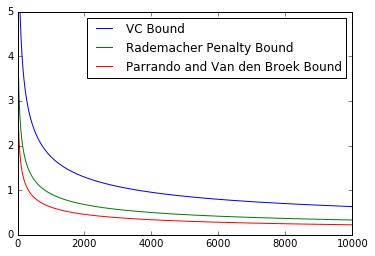

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

dvc = 50
delta = 0.05
def vc(N):
    ''' original VC bound: epsilon as function of N'''
    return math.sqrt( (8/N) * math.log((4* (2*N)**dvc) / delta))
    
def radPen(N):
    ''' Rademacher Penalty Bound '''
    return math.sqrt((2 * math.log(2*N * N**dvc))/ N) + math.sqrt(2/N * math.log(1/delta)) + 1 / N
    
def parVan(N):
    '''Parrondo and Van den Broek Bound: implicit formula estimated with initial guess of 1'''
    def estParVan(N, eps):
        estimate = math.sqrt(1/N * (2 * eps + math.log( (6 * (2*N)**dvc) / delta )))
        if (estimate - eps) <= 0.00001:
            return estimate
        else:
            return estParVan(N, estimate)
    return estParVan(N, 0.5)
    
    # use other bound as initial guess
    guess = radPen(N)
    
    return estParVan(N, guess)
    
def devroye(N):
    ''' Devroye Bound: implicit formula estimated with initial guess of 1'''
    def estDev(N, eps):
        estimate = math.sqrt(1/(2*N) * ( 4*eps*(1+eps) +  math.log(4 / delta) + dvc * math.log(N**2) ) )
        if (estimate - eps)**2 <= 0.0001:
            return estimate
        else:
            return estDev(N, estimate)
        
    # use other bound as initial guess
    guess = radPen(N)
    return estDev(N, guess)

N = np.arange(1, 10000, 5)

plt.plot(N, np.vectorize(vc)(N), label = "VC Bound")
plt.plot(N, np.vectorize(radPen)(N), label = "Rademacher Penalty Bound")
plt.plot(N, np.vectorize(parVan)(N), label = "Parrando and Van den Broek Bound")
#plt.plot(N, np.vectorize(devroye)(N), label = "Devroye Bound")
plt.legend()
plt.ylim(0, 5)
plt.xlim(10, 10000)

def printTestValues(test_N):
    print("For N = {}:".format(test_N))
    print("vc is {}".format(vc(test_N)))
    print("Rademacher is {}".format(radPen(test_N)))
    print("Parrondo and Van den Broek is {}".format(parVan(test_N)))
    print("Devroye is {}".format(devroye(test_N)))

# Q2
printTestValues(10000)
print()
#Q3
printTestValues(5)

__A2. [d] __

__A3. [c] __

Consider the case where the target function $f : [−1, 1] \rightarrow \mathbb{R}$ is given by $f(x) = \sin(\pi x)$ and the input probability distribution is uniform on $[−1, 1]$. Assume that the training set has only two examples (picked independently), and that the learning algorithm produces the hypothesis that minimizes the mean squared error on the examples.

Q4. Assume the learning model consists of all hypotheses of the form $h(x) = ax$.
What is the expected value, $\bar{g}(x)$, of the hypothesis produced by the learning
algorithm (expected value with respect to the data set)? Express your $\bar{g}(x)$ as
$\bar{a}x$ , and round $\bar{a}$ to two decimal digits only, then match exactly to one of the
following answers.

A4. With just two training examples, $(x_1, y_1)$ and $(x_2, y_2)$, and $h(x) = ax$, the average mean squared error is, 

$$\epsilon(a) = \frac{1}{2} \left [ (a x_1 - y_1)^2 + (a x_2 - y_2)^2 \right ] $$

where, setting the derivative to $0$ to find minimizing value of $a$, 

$$\frac{d \epsilon}{d a} = x_1(a x_1 - y_1) + x_2(ax_2 - y_2) = ax_1^2 + ax_2^2 - x_1y_1 - x_2y_2 = 0 $$

$$a(x_1^2 + x_2^2) = x_1y_1 + x_2y_2$$

$$ a = \frac{x_1y_1 + x_2y_2}{x_1^2 + x_2^2} $$

In [264]:
def run(data = None):
    ''' run learning algorithm once, return hypothesis'''
    # 2 training examples
    train = np.random.uniform(-1, 1, 2)

    # target function
    f = lambda x: np.sin(np.pi * x)

    # evaluate training examples with target function
    y = f(train)

    return (np.inner(train, y) / np.sum(np.square(train)))
    

# run 1000 times
gs = [run() for n in range(10000)]

# average is expected g; truncated to 2 decimal points
a_avg = sum(gs) / len(gs)
print("{0:.2f}".format(a_avg))

1.43


__ 4A. [e] None of the above __

In [354]:
# alternate monte carlo estimate for bias
t1 = np.random.uniform(-1, 1, 100000)

f = lambda x: np.sin(np.pi * x)

np.average(np.square(1.43 *t1 - f(t1)))

0.27074272572060754

For the bias,

$$\text{bias} = \mathbb{E}_x [\text{bias}(x) ] = \mathbb{E}_x [(\bar{g}(x) - f(x))^2] $$


So with $\bar{g}(x) = 1.43x$ and $f(x) = \sin(\pi x)$, 

$$\text{bias} = \mathbb{E}_X [ (1.43x - \sin(\pi x) )^2 ] $$

$$ \text{bias} = \int_{x=-1}^{1} p(x) (1.43x - \sin(\pi x))^2 $$

Where $p(x)$ is a _uniform_ probability from $-1$ to $1$, i.e., 

$$p(x) = \frac{1}{1 - (-1)} = \frac{1}{2}$$, 

so, 

$$\text{bias} = \frac{1}{2} \int_{x=-1}^{1} (1.43 x - \sin(\pi x))^2 \approx 0.271$$


__ 5A. [b] 0.3 __

Q6. What is the closest value to the variance in this case? 

A. We estimate it by randomly generating samples of $\mathcal{D}$, evaluating the expected value (and noting again that $p(x)$ is uniform, so equals $1/2$), and then averaging these expected values to estimate the variance. 

$$\text{var} = \mathbb{E}_{X} [ \mathbb{E}_{\mathcal{D}} [ (g^{(\mathcal{D})}(x) - \bar{g}(x))^2 ]] $$

We approximate this with a simple Monte Carlo method as follows: randomly choose two points that make up a given data set $\mathcal{D}$. Use these two points to determine a hypothesis $g^{(\mathcal{D})}$, and then get a new set of test points as $x$ between -1 and 1 to approximate the  

In [353]:
test = np.random.uniform(-1, 1, 10000)
f = lambda x: np.sin(np.pi * x)

var = np.empty(1000)
for i in range(1000):
    g = run()
    test = np.random.uniform(-1, 1, 1000)
    # multiply each estimated variance by 0.5 since there are d
    var[i] = np.average(np.square(g*test - 1.43*test))


np.average(var)

0.23199243506192993

__A6. [a] __ 0.2

Q7. Now, let’s change $\mathcal{H}$. Which of the following learning models has the least expected value of out-of-sample error?

For the following, we calculate the bias and variance and sum them since,



We express the error of each of the hypothesis as being transformations of the squared error of linear regression. Explicitly, let $\theta = [b, a]$, so that the minimizing value is given by,

$$\mathbf{\theta} = (X^T X)^{-1} X^T \mathbf{y}$$

For $h(x) = b$, let $x_i = [1, 0]$ 

Similarly,

$$
\begin{align}
h(x) = ax &\implies x_i = [x, 0] \\
h(x) = ax + b &\implies x_i = [x, 1] \\
h(x) = ax^2  &\implies x_i = [x^2, 0] \\
h(x) = ax^2 + b &\implies x_i = [x^2, 1]
\end{align}
$$

In [514]:
# function to transform and combine
combine = lambda a,b: np.concatenate((a.reshape(1, a.shape[0]), b.reshape(1, b.shape[0])))

# target function
f = lambda x: np.sin(np.pi * x)

# transformed xs
x_a = lambda x: combine(np.zeros(x.shape[0]), np.zeros(x.shape[0]))
x_b = lambda x: combine(x, np.zeros(x.shape[0]))
x_c = lambda x: combine(x, np.ones(x.shape[0]))
x_d = lambda x: combine(np.square(x), np.zeros(x.shape[0]))
x_e = lambda x: combine(np.square(x), np.ones(x.shape[0]))
xs = [x_a, x_b, x_c, x_d, x_e]

theta = lambda x,y: np.inner(np.linalg.pinv(x).T, y) 

# data to approximate expected g value
data = np.random.uniform(-1, 1, 1000)

# thetas for all values
thetas = [theta(x(data), f(data)) for x in xs]


def g(x, theta):
    ''' returns hypotheses given theta '''
    return x * theta[0] + theta[1]

def bias(theta, f):
    ''' estimates bias given hypothesis (theta) and target function '''
    test = np.random.uniform(-1, 1, 1000)
    return np.average(np.square(g(test, theta) - f(test)))

# get variances
variances = []

for j, t in enumerate(thetas):
    variances.append(np.empty(1000))
    for i in range(1000):
        # smaller training data of just 2 examples
        train = np.random.uniform(-1, 1, 2)

        
        g_t = theta(xs[j](train), f(train))

        # test data to compare with average hypothesis
        test = np.random.uniform(-1, 1, 1000)

        # get average hypothesis for test
        variances[j][i] = np.average(np.square(g(test, g_t) - g(test, t)))
    


In [528]:
exp_biases = [bias(t, f) for t in thetas]

exp_var = [np.average(v) for v in variances]


error = (bis + vas for bis,vas in zip(exp_biases, exp_var))

for err in error:
    print(err)

0.49696437478
0.532258606647
1.83423175771
24.6238258668
3447.68076466


__ A7. [a] Hypotheses of the form h(x) = b __

Q8. Assume $q \geq 1$ is an integer and let $m_{\mathcal{H}}(1) = 2$. What is the VC dimension of a hypothesis set whose growth function satisfies: $m_{\mathcal{H}}(N + 1) = 2 m_{\mathcal{H}}(N) − {N \choose q}$ ? Recall that ${M \choose m} = 0$ when $m > M$. 

Note that for any $N < q$, ${N \choose q} = 0$, so that, 

$$m_{\mathcal{H}}(2) = 2 m_{\mathcal{H}}(1) = 2^2 $$
$$m_{\mathcal{H}}(3) = 2 m_{\mathcal{H}}(2) = 2^3 $$
$$m_{\mathcal{H}}(q) = 2m_{\mathcal{H}}(q-1) = 2 (2 m_{\mathcal{H}}(q-2)) = 2 ( 2( \ldots (2 m_{\mathcal{H}}(1))) = 2^q$$

Then, since, 

$$m_{\mathcal{H}}(q+1) = 2 m_{\mathcal{H}}(q) - {q \choose q} = 2^{q+1} - 1 < 2^{q+1}$$

It follows that the breakpoint is $q$. 

__ 8A. [c] __

Q9. For hypothesis sets $\mathcal{H}_1, \mathcal{H}_2, \ldots, \mathcal{H}_K$ with finite, positive VC dimensions $d_{vc}(\mathcal{H}_k)$, some of the following bounds are correct and some are not. Which among the correct ones is the tightest bound (the smallest range of values) on the VC dimension of the __intersection__ of the sets: $d_{vc}(\cap_{k=1}^{K} \mathcal{H}_k)$? (The VC dimension of an empty set or a singleton set is taken as zero)

We start from the tightest possible lower bound and check its correctness, i.e.,  

$$ \text{min} \{ d_{VC} (\mathcal{H}_K) \}^K_{k=1} \leq d_{VC} (\cap_{k=1}^K \mathcal{H}_k) $$

To disprove the left side, consider that if $(\cap_{k=1}^K \mathcal{H}_k) = \emptyset$, then $d_{VC} (\mathcal{H}_k) = 0$. Since each hypothesis set has positive VC dimension by construction, the min of the set is strictly larger than $0$, so the next tightest possible bound is now, 

$$0 \leq d_{VC} (\cap_{k=1}^K \mathcal{H}_k) $$

For the righthand side, the tightest possible bound is 

$$ d_{VC} (\cap_{k=1}^K \mathcal{H}_k)  \leq \text{min} \{d_{VC} (\mathcal{H}_k) \}_{k=1}^{K} $$

Clearly the subset of a hypothesis set can shatter at _most_ as many points as its superset. Since the intersection is a subset of each hypothesis set, it follows it's also a subset of the hypothesis set with the minimum VC dimension and the above holds. 

__9A. [b] $0 \leq d_{VC} (\cap_{k=1}^{K} \mathcal{H}_k ) \leq d_{VC} (\mathcal{H}_i)$ __

Q10. For hypothesis sets $\mathcal{H}_1, \mathcal{H}_2, \ldots, \mathcal{H}_K$ with finite, positive VC dimensions $d_{vc}(\mathcal{H}_k)$, some of the following bounds are correct and some are not. Which among the correct ones is the tightest bound (the smallest range of values) on the VC dimension of the __union__ of the sets: $d_{vc}(\cup_{k=1}^{K} \mathcal{H}_k)$? 

Similarly, we start from the tightest possible lower bound and check its correctness: 

$$\text{max} \{d_{VC} (\mathcal{H}_k) \}_{k=1}^{K} \leq d_{vc}(\cup_{k=1}^{K} \mathcal{H}_k)$$

We use the same argument as above (that a subset's VC dimension is at most that of its superset), noting that every hypothesis set is a subset of the union, so that the hypothesis set with the max VC dimension is also a subset of the union and thus the above holds. 

The tightest possible upper bound is, 

$$ d_{VC}(\cup_{k=1}^{K} \mathcal{H}_k) \leq \sum_{k=1}^K d_{VC} (\mathcal{H}_k) $$

For a counterexample, consider the case of two hypothesis sets $\mathcal{H_1}$ and $\mathcal{H_2}$ on $\mathbb{R}^2$. Suppose $\mathcal{H_1}$ can label just one point as $+1$ or $-1$ (so that all the rest become the opposite sign) and that $\mathcal{H_2}$ can only label either all points as $+1$ or all points as $-1$. Clearly each hypothesis set can only shatter one point. Their union, however, can shatter 3 points. So the only other possibility is 

$$ d_{VC}(\cup_{k=1}^{K} \mathcal{H}_k) \leq K - 1 + \sum_{k=1}^K d_{VC} (\mathcal{H}_k) $$

__10A. [e] $\text{max} \{d_{VC} (\mathcal{H}_k) \}_{k=1}^{K} \leq d_{vc}(\cup_{k=1}^{K} \mathcal{H}_k)  \leq K - 1 + \sum_{k=1}^K d_{VC} (\mathcal{H}_k)$ __